<a href="https://colab.research.google.com/github/coslicoc/python_data_proc/blob/main/%D0%9A%D0%B0%D1%80%D0%B8%D0%BA%D0%BE%D0%B2%D0%B0_%D0%A0%D0%93_%D0%9B%D0%A0_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --quiet selenium
!apt update
!apt install --quiet chromium-chromedriver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 26.6 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,564 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:1

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
import time
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

1. В разделе https://www.chipdip.ru/catalog-show/glass-fuses скачайте данные по первым 20
страницам, используя библиотеки requests и BeautifulSoup.

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
dr = webdriver.Chrome(options=options)

In [ ]:
def extract(product_card):
    try:
        name=product_card.find('div',class_='item__name').\
      find('a',class_='link').text
        print(name)
        price=product_card.\
      find('span',class_='price__value').text
        try:
          supply=product_card.\
      find('span',class_='item__avail item__avail_available nw').text
        except:
          supply=product_card.\
                find('span',class_='item__avail item__avail_delivery').text
        link=product_card.find('div',class_='item__name').\
      find('a',class_='link')['href']

    except:
        name,price,supply,link='','','',''
    return pd.Series([name,price,supply,link],index=['name','price','supply','link'])

In [ ]:
df=pd.DataFrame()

In [ ]:
for i in range(1, 21):
  url='https://www.chipdip.ru/catalog-show/glass-fuses?page={}'.format(i)
  dr = webdriver.Chrome(options=options)
  dr.get(url)
  soup=BeautifulSoup(dr.page_source)
  print(i)
  tmp=pd.concat([extract(x) for x in soup.find('div',class_='items-column').\
                 find_all('div', class_="item")],axis=1).transpose()
  df=pd.concat([df,tmp])
  time.sleep(random.randint(5,15))

1
 AGU (AUE), 10 A , 250 В, 10x38 мм, Предохранитель
 AGU (AUE), 20 A , 250 В, 10x38 мм, Предохранитель
 AGU (AUE), 30 A , 250 В, 10x38 мм, Предохранитель
 AGU (AUE), 40 А, 250 В, 10x38 мм, Предохранитель
 AGU (AUE), 50 A , 250 В, 10x38 мм, Предохранитель
 AGU (AUE), 60 А, 250 В, 10x38 мм, Предохранитель
 AGU (AUE), 70 A , 250 В, 10x38 мм, Предохранитель
 H520 (ZH214), 0.05 А, 250В, 5х20 мм, Предохранитель стеклянный быстродействующий
 H520 (ZH214), 0.1 А, 250В, 5х20 мм, Предохранитель стеклянный быстродействующий
 H520 (ZH214), 0.25 А, 250В (ВПБ6-2), 5х20 мм, Предохранитель стеклянный ...
 H520 (ZH214), 0.5 А, 250В (ВПБ6-5), 5х20 мм, Предохранитель стеклянный ...
 H520 (ZH214), 0.63 А, 250В, 5х20 мм, Предохранитель стеклянный быстродействующий
 H520 (ZH214), 1 А, 250В (ВПБ6-7), 5х20 мм, Предохранитель стеклянный ...
 H520 (ZH214), 1.6 А, 250В, 5х20 мм, Предохранитель стеклянный быстродействующий
 H520 (ZH214), 2 А, 250В (ВПБ6-10), 5х20 мм, Предохранитель стеклянный ...
 H520 (ZH214), 

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.index=range(df_copy.shape[0])

In [ ]:
df_copy

,name,price,supply,link
0,"AGU (AUE), 10 A , 250 В, 10x38 мм, Предохрани...",84,1804 шт.,/product/agu-aue-10a-10x38
1,"AGU (AUE), 20 A , 250 В, 10x38 мм, Предохрани...",58,4399 шт.,/product/agu-aue-20a-10x38
2,"AGU (AUE), 30 A , 250 В, 10x38 мм, Предохрани...",98,856 шт.,/product/agu-aue-30a-10x38
3,"AGU (AUE), 40 А, 250 В, 10x38 мм, Предохранитель",98,768 шт.,/product/agu-aue-40a-10x38
4,"AGU (AUE), 50 A , 250 В, 10x38 мм, Предохрани...",98,632 шт.,/product/agu-aue-50a-10x38
...,...,...,...,...
435,"Предохранитель 6,0x30, ток 2,0А, стекло, KF-0...",32,"3-4 дня, 32 шт.",/product0/8010255842
436,"Предохранитель 6,0x30, ток 20 А, стекло, KF-0...",48,"3-4 дня, 90 шт.",/product0/8010256484
437,"Предохранитель 6,0x30, ток 25 А, керамика, KF...",110,"3-4 дня, 105 шт.",/product0/8010256067
438,"Предохранитель 6,0x30, ток 25 А, стекло, KF-0...",48,"3-4 дня, 101 шт.",/product0/8010256028


2. Распарсите полученные страницы в датафрейм df вида (используйте регулярные
выражения): Бренд, Название, Артикул, ТОК, Номинальное
напряжение,
Размеры корпуса,
Тип, Цена, Кол-во,
Срок
поставки

In [ ]:
def apply_re(pattern, string)-> str:
  extracted = re.findall(pattern, string, re.IGNORECASE)
  return extracted[0] if extracted else ''

In [ ]:
df_copy['long_name'] = df_copy['name']

In [ ]:
df_copy['name'] = df_copy['long_name'].apply(lambda x: apply_re(
    r'(?:(?:предохр|плавкая вставка|cartridge fuses|plugin fuses)[^,;]*)(?=\s*(?:[^0-9\s,;-]*[^\d\s,;]+)(?:[,;]$|$))',
    x))

In [ ]:
df_copy['name']

,name
0,Предохранител
1,Предохранител
2,Предохранител
3,Предохранител
4,Предохранител
...,...
435,
436,
437,
438,


In [ ]:
df_copy['amper']=df_copy['long_name'].str.findall(', [ \w,]*[AАмАmA] ?,',).\
apply(lambda x: re.search('\d+,?\d*',x[0])[0].\
      replace(',','.') if len(x)>0 else 0).astype(float)

In [ ]:
df_copy['amper']

,amper
0,10.0
1,20.0
2,30.0
3,40.0
4,50.0
...,...
435,2.0
436,20.0
437,25.0
438,25.0


In [ ]:
df_copy['voltage'] = df_copy['long_name'].apply(lambda x: apply_re(r'\d+[.,]?\d*\s*[ВBVкВkV]', x))
df_copy['voltage'] = df_copy['voltage'].apply(lambda x: float(re.sub(r'[^\d.]', '', x) if x else 0))

In [ ]:
df_copy['voltage']

,voltage
0,250.0
1,250.0
2,250.0
3,250.0
4,250.0
...,...
435,0.0
436,0.0
437,0.0
438,0.0


In [ ]:
df_copy['size'] = df_copy['long_name'].apply(lambda x: apply_re(r'\d+[.,]?\d*[xх]\d+[.,]?\d*', x))

In [ ]:
df_copy['date'] = df_copy['long_name'].apply(lambda x: apply_re(r'\d{1,2}[./-]\d{1,2}[./-]\d{2,4}', x))

In [ ]:
def define_type(x):
  if 'быстр' in x.lower():
    return 'быстродействующий'
  elif 'медлен' in x.lower():
    return 'медленного срабатывания'
  return 'обычный'

In [ ]:
df_copy['type'] = df_copy['long_name'].apply(lambda x: define_type(x))

In [ ]:
df_copy['article'] = df_copy['link'].apply(lambda x : x.split('/')[-1]) #точно так???

In [ ]:
df_copy['price'] = df_copy['price'].apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
df_copy['supply'] = df_copy['supply'].apply(lambda x: int(re.sub(r'[^\d]', '', x)))

In [ ]:
df_copy =  df_copy[['name', 'article', 'amper', 'voltage', 'size', 'type', 'price', 'supply']]

In [ ]:
df_copy

,name,article,amper,voltage,size,type,price,supply
0,Предохранител,agu-aue-10a-10x38,10.0,250.0,10x38,обычный,84.0,1804
1,Предохранител,agu-aue-20a-10x38,20.0,250.0,10x38,обычный,58.0,4399
2,Предохранител,agu-aue-30a-10x38,30.0,250.0,10x38,обычный,98.0,856
3,Предохранител,agu-aue-40a-10x38,40.0,250.0,10x38,обычный,98.0,768
4,Предохранител,agu-aue-50a-10x38,50.0,250.0,10x38,обычный,98.0,632
...,...,...,...,...,...,...,...,...
435,,8010255842,2.0,0.0,"6,0x30,",обычный,32.0,3432
436,,8010256484,20.0,0.0,"6,0x30,",обычный,48.0,3490
437,,8010256067,25.0,0.0,"6,0x30,",обычный,110.0,34105
438,,8010256028,25.0,0.0,"6,0x30,",обычный,48.0,34101


4. Постройте группировку по переменной тип, в качестве агрегации используя - среднюю цену, максимальное количество на складе, минимальное число артикулов в группе

In [ ]:
df_copy.groupby('type').agg(
  mean_price=('price', 'mean'),
  max_supply=('supply', 'max'),
  min_article=('article', 'min')
)

,mean_price,max_supply,min_article
type,,,
быстродействующий,293.056000,511980,520.622-3.15a-bystr.steklo
медленного срабатывания,120.219512,343473,522.0250-0.25-a-250-v-5-20
обычный,180.470803,345300,0251.250mat1l-250ma-125v


5. Проведите анализ качества предохранителей:
- Выявите самый лучший предохранитель внутри каждой категории, по техническим характеристикам.
- Определите индекс качества каждого предохранителя относительно лучшего в
категории – разделите значения характеристик на лучшие, и суммируйте полученные числа.
- Постройте три линейных графика – зависимость цены от индекса качества.



In [ ]:
df_copy['qual_idx'] = df_copy['price'] / df_copy['price'].max() + df_copy['supply'] / df_copy['supply'].max()

<ipython-input-271-017e8a23fa0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['qual_idx'] = df_copy['price'] / df_copy['price'].max() + df_copy['supply'] / df_copy['supply'].max()


In [ ]:
best = df_copy.groupby('type')['qual_idx'].idxmax()
df_copy.loc[best]

,name,article,amper,voltage,size,type,price,supply,qual_idx
215,Предохранитель стеклянный быстродействующи,521.0500-0.5-a-250-v-5-20,0.0,250.0,,быстродействующий,16.0,511980,1.002469
304,,8021539570,2.0,250.0,5x20,медленного срабатывания,58.0,343473,0.679823
284,Предохранитель 10A 690V 000U/80 GR U,8010349837,0.0,690.0,,обычный,4980.0,341,0.769185


Text(0, 0.5, 'price')

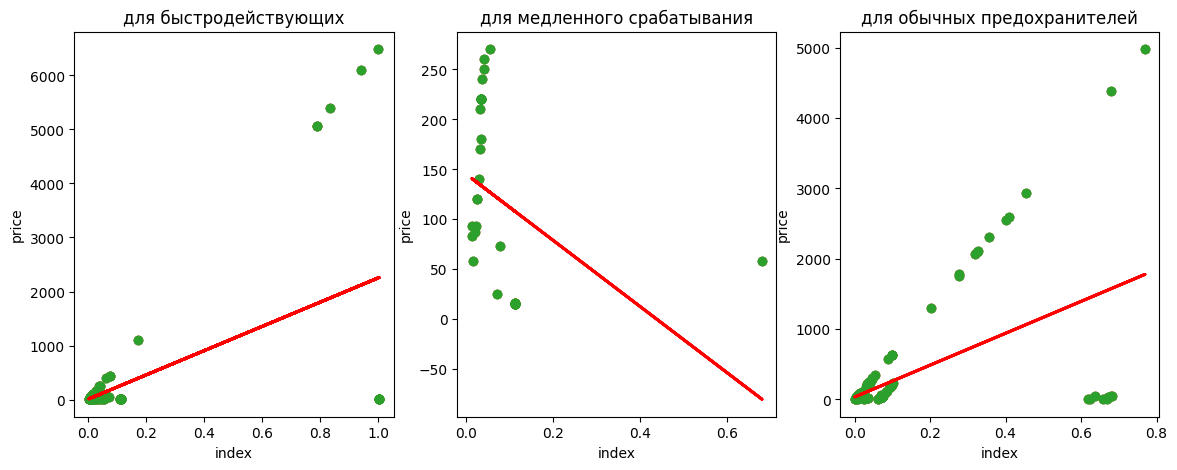

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
for category in df_copy['type'].unique():
  subset = df_copy[df_copy['type'] == 'быстродействующий']
  plt.scatter(subset['qual_idx'], subset['price'], marker='o')

  X = subset['qual_idx'].values.reshape(-1, 1)
  y = subset['price'].values
  model = LinearRegression().fit(X, y)
  plt.plot(subset['qual_idx'], model.predict(X), color='red', linewidth=2)

plt.title('для быстродействующих')
plt.xlabel('index')
plt.ylabel('price')

plt.subplot(1, 3, 2)
for category in df_copy['type'].unique():
  subset = df_copy[df_copy['type'] == 'медленного срабатывания']
  plt.scatter(subset['qual_idx'], subset['price'], marker='o')

  X = subset['qual_idx'].values.reshape(-1, 1)
  y = subset['price'].values
  model = LinearRegression().fit(X, y)
  plt.plot(subset['qual_idx'], model.predict(X), color='red', linewidth=2)

plt.title('для медленного срабатывания')
plt.xlabel('index')
plt.ylabel('price')

plt.subplot(1, 3, 3)
for category in df_copy['type'].unique():
  subset = df_copy[df_copy['type'] == 'обычный']
  plt.scatter(subset['qual_idx'], subset['price'], marker='o')

  X = subset['qual_idx'].values.reshape(-1, 1)
  y = subset['price'].values
  model = LinearRegression().fit(X, y)
  plt.plot(subset['qual_idx'], model.predict(X), color='red', linewidth=2)

plt.title('для обычных предохранителей')
plt.xlabel('index')
plt.ylabel('price')

6. Определите ценовой сегмент для каждого предохранителя. Используйте полученные
ранее индексы качества


In [ ]:
df_copy['price_segment'] = pd.cut(df_copy['qual_idx'], bins=3, labels=['cheap', 'middle', 'expensive'])

<ipython-input-274-52fcafa8fdd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['price_segment'] = pd.cut(df_copy['qual_idx'], bins=3, labels=['cheap', 'middle', 'expensive'])


In [ ]:
df_copy

,name,article,amper,voltage,size,type,price,supply,qual_idx,price_segment
0,Предохранител,agu-aue-10a-10x38,10.0,250.0,10x38,обычный,84.0,1804,0.016487,cheap
1,Предохранител,agu-aue-20a-10x38,20.0,250.0,10x38,обычный,58.0,4399,0.017543,cheap
2,Предохранител,agu-aue-30a-10x38,30.0,250.0,10x38,обычный,98.0,856,0.016795,cheap
3,Предохранител,agu-aue-40a-10x38,40.0,250.0,10x38,обычный,98.0,768,0.016624,cheap
4,Предохранител,agu-aue-50a-10x38,50.0,250.0,10x38,обычный,98.0,632,0.016358,cheap
...,...,...,...,...,...,...,...,...,...,...
435,,8010255842,2.0,0.0,"6,0x30,",обычный,32.0,3432,0.011642,cheap
436,,8010256484,20.0,0.0,"6,0x30,",обычный,48.0,3490,0.014224,cheap
437,,8010256067,25.0,0.0,"6,0x30,",обычный,110.0,34105,0.083589,cheap
438,,8010256028,25.0,0.0,"6,0x30,",обычный,48.0,34101,0.074014,cheap


7. Определите самый дефицитный предохранитель – с самым долгим сроком поставки, и минимальным числом в наличии на складе

In [ ]:
df_copy.loc[df_copy['supply'].idxmin()]

,172
name,
article,9001506066
amper,0.0
voltage,250.0
size,
type,обычный
price,2940.0
supply,1
qual_idx,0.453706
price_segment,middle


8. Проверьте гипотезу о связи тока и номинального напряжения в предохранителях:
- Разбейте ток и номинальное напряжение по две группы соответственно
- Постройте таблицу сопряженности – группированный ток vs группированное
напряжение, с частотой предохранителей в ячейках.
- Проведите по построенной таблице тест хи-квадрат (scipy.stats.chi_contingency)

In [ ]:
df_copy['groupped_amper'] = pd.cut(df_copy['amper'], bins=2, labels=['fst', 'scd'])
df_copy['groupped_voltage'] = pd.cut(df_copy['voltage'], bins=2, labels=['fst', 'scd'])

In [ ]:
contingency_table = pd.crosstab(df_copy['groupped_amper'], df_copy['groupped_voltage'])
contingency_table

groupped_voltage,fst,scd
groupped_amper,,
fst,390,46
scd,4,0


In [ ]:
import scipy.stats as sts

In [ ]:
sts.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[390.41818182,  45.58181818],
       [  3.58181818,   0.41818182]]))

9. Визуализируйте с помощью тепловой карты зависимость цены от группированного тока и группированного напряжения.


<Axes: xlabel='groupped_voltage', ylabel='groupped_amper'>

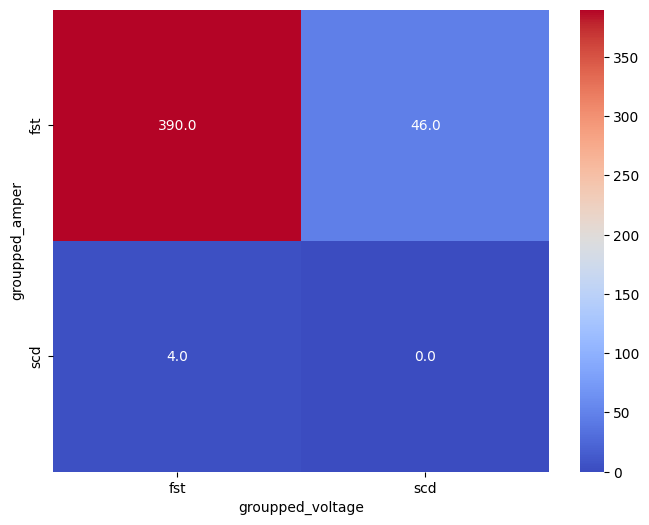

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='.1f', cmap='coolwarm')

10. Постройте линейную регрессию и определите наиболее значимые характеристики
товара, влияющие на рост цены.

In [ ]:
X = df_copy[['amper', 'voltage', 'supply']]
y = df_copy['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse: {mse}")
print(f"R2: {r2}")


mse: 685646.4058342121
R2: 0.10015768553625504


In [ ]:
coeffs = pd.DataFrame(model.coef_, X.columns, columns=['coeffs'])
print(coeffs)

           coeffs
amper   -0.198116
voltage  1.109367
supply  -0.000628
